## Common Machine Learning Techniques with Python
### Note - The purpose of this notebook is a quick reference for implementation and will have NO EDA.
Source: This is a showcase/reference of projects completed during the Udemy course by Jose Portilla listed below </br>
https://www.udemy.com/share/101WaUCEISeFtaQ3g=/

## Linear Regression 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

In [3]:
# importing the data
customers = pd.read_csv('data//Ecommerce Customers')
customers.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [4]:
# Splitting into X and Y Variables
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y =  customers['Yearly Amount Spent']

# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [5]:
# Importing and building an Instance
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [6]:
# Fitting and printing coefficients
lm.fit(X_train, y_train)
print("Coefficients: \n", lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


In [7]:
# Predicting
predictions = lm.predict(X_test)

In [8]:
# Model Validation
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430835
MSE: 79.81305165097443
RMSE: 8.933815066978633


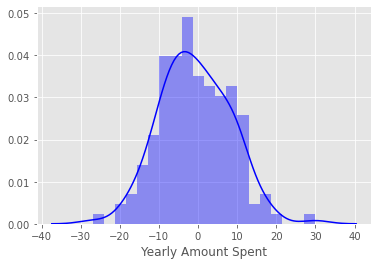

In [9]:
# Checking residuals
sns.distplot((y_test-predictions),bins=20, color = 'blue');

In [10]:
# Validating the coefficients
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Logistic Regression

In [11]:
ad_data = pd.read_csv('data//advertising.csv')

In [12]:
# importing logistic regression
from sklearn.linear_model import LogisticRegression

# setting X and Y
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [13]:
# Instatiating 
logReg = LogisticRegression()

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Fitting the model
logReg.fit(X_train, y_train)

LogisticRegression()

In [14]:
# Predicting and Making a classification report
predictions = logReg.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

# Making the classification report
print('Classification Report:')
print(classification_report(y_test,predictions))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(y_test,predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



Confusion Matrix:
[[149   8]
 [ 14 129]]


## K Nearest Neighbors

In [15]:
df = pd.read_csv('data//KNN_Project_Data')

In [16]:
# Standardizing the variables, a key step in KNN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
# Preprocessing
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])

# Notice all values are close numerically 
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [18]:
# Train Test Split
X = df_feat
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 101)

In [19]:
# Importing/Instantiating the variable (with K = 1)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

# Fitting
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

In [20]:
# Making the classification report
print('Classification Report:')
print(classification_report(y_test,predictions))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(y_test,predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



Confusion Matrix:
[[109  43]
 [ 41 107]]


### Applying the "Elbow" Method

Text(0, 0.5, 'Error Rate')

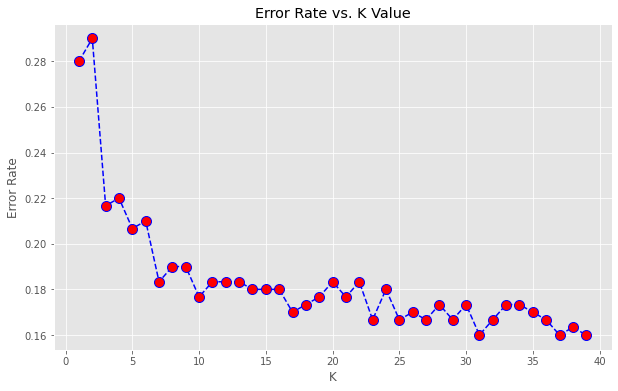

In [21]:
error_rate = []

# Looping over values of K (1 - 40)
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [22]:
# Finding the minimum
minpos = error_rate.index(min(error_rate)) 
print(minpos)

30


In [23]:
# Retaining on K = 30
knn_30 = KNeighborsClassifier(n_neighbors=30)
knn_30.fit(X_train,y_train)
predictions = knn_30.predict(X_test)

# Printing the confusion matrix
print("Classification Report:")
print(classification_report(y_test,predictions))
print('\n')
print("Confusion Matrix:")
print(confusion_matrix(y_test,predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



Confusion Matrix:
[[124  28]
 [ 24 124]]


## Random Forest

In [24]:
loans = pd.read_csv('data//loan_data.csv')

In [25]:
# Changing some of the variables to factors
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [26]:
cat_feats = ['purpose']
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [27]:
# Separating X/Y and doing a train test split
X = final_data.drop('not.fully.paid',axis=1) 
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [28]:
# Importing Random Forest
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier()

In [29]:
# Fitting and Predicting 
rand_forest.fit(X_train, y_train)
pred = rand_forest.predict(X_test)

# Printing the confusion matrix
print("Classification Report:")
print(classification_report(y_test,pred))
print('\n')
print("Confusion Matrix:")
print(confusion_matrix(y_test,pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2431
           1       0.43      0.03      0.05       443

    accuracy                           0.84      2874
   macro avg       0.64      0.51      0.49      2874
weighted avg       0.78      0.84      0.78      2874



Confusion Matrix:
[[2414   17]
 [ 430   13]]


## Support Vector Machines Using the Iris Dataset

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [31]:
iris = sns.load_dataset('iris')

In [32]:
# Labeling 
X = iris.drop(['species'], axis = 1)
y = iris.species

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [33]:
# Fitting the Model
model = SVC()
model.fit(X_train, y_train)

SVC()

In [34]:
# Predicting
pred = model.predict(X_test)

# Printing the confusion matrix
print("Classification Report:")
print(classification_report(y_test,pred))
print('\n')
print("Confusion Matrix:")
print(confusion_matrix(y_test,pred))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Confusion Matrix:
[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


In [35]:
# Using gridsearch to fit the model
param_grid = {'C':[0.1, 1, 10, 100, 1000], "gamma": [1,0.1,0.01,0.001,0.0001]}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.4s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=1)

In [36]:
# Using the gridsearch predictions
grid_predictions = grid.predict(X_test)

# Printing the confusion matrix
print("Classification Report:")
print(classification_report(y_test,grid_predictions))
print('\n')
print("Confusion Matrix:")
print(confusion_matrix(y_test,grid_predictions))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Confusion Matrix:
[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


## K Means Clustering

In [37]:
from sklearn.cluster import KMeans

In [38]:
df = pd.read_csv('data//College_Data', index_col=0)

In [39]:
# Instantiating/Fitting (After Dropping the response variable)
kmeans = KMeans(n_clusters=2)
kmeans.fit(df.drop('Private', axis = 1))

KMeans(n_clusters=2)

In [40]:
kmeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.51195815e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

In [41]:
df['Cluster'] = np.where(df['Private'] == 'Yes', 1, 0)

In [42]:
# Printing the confusion matrix
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print("\n")
print(classification_report(df['Cluster'],kmeans.labels_))

[[138  74]
 [531  34]]


              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



## PCA for Dimensionality Reduction

In [43]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

# Loading the DF
cancer = load_breast_cancer()
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [44]:
# Fitting with Standard Scaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [45]:
# Reducing to two components and fitting
pca = PCA(n_components=2)

# Fitting/Transforming
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

Text(0, 0.5, 'Second Principal Component')

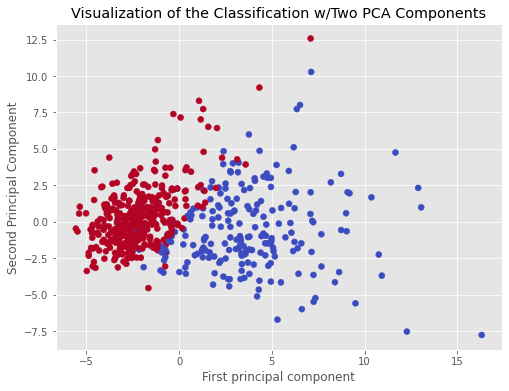

In [46]:
# Visualization of the 30 Features to Two
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='coolwarm')
plt.title("Visualization of the Classification w/Two PCA Components")
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

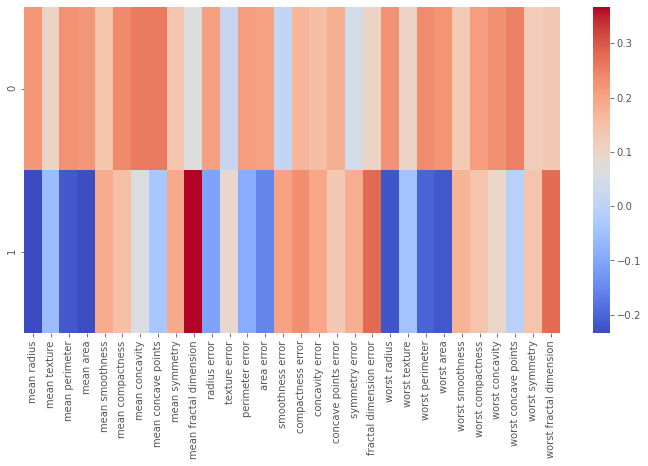

In [47]:
# Creating a heatmat of the components across the feature space 
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='coolwarm',)

## Neural Net Example Using Make Blobs

In [48]:
# Importing Machine Learning Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from matplotlib.colors import ListedColormap

In [49]:
# Making the dataset
from sklearn.datasets import make_moons
X_train, y_train = make_moons(n_samples=500, noise=0.2, random_state=101)
X_test, y_test = make_moons(n_samples=100, noise=0.2, random_state=101)

In [50]:
# Building the model (infers the input shape of 2 nodes)
model = Sequential()

# Hidden layers with five nodes each
model.add(Dense(units=5,activation='sigmoid'))
model.add(Dense(units=5,activation='sigmoid'))

# Output node
model.add(Dense(units=1,activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [51]:
# Fitting the Model
model.fit(x = X_train, y = y_train, validation_data=(X_test, y_test), epochs=500, verbose=0)

Text(0.5, 1.0, 'Plot of the Test Data')

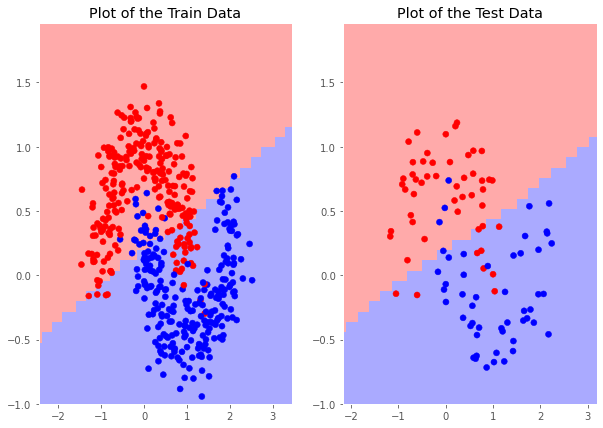

In [52]:
# Preparing Data
h = .08 
        
# Create color maps
cmap_light = ListedColormap(["#FFAAAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#0000FF"])

# calculate min, max and limits (training)
x_min, x_max = X_train.min() - 1, X_train.max() + 1
y_min, y_max = y_train.min() - 1, y_train.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
np.arange(y_min, y_max, h)) 

# predict class using data 
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# calculate min, max and limits (testing)
x_min_t, x_max_t = X_test.min() - 1, X_test.max() + 1
y_min_t, y_max_t = y_test.min() - 1, y_test.max() + 1
xx_t, yy_t = np.meshgrid(np.arange(x_min_t, x_max_t, h), 
np.arange(y_min_t, y_max_t, h)) 

# predict class using data 
Z_t = model.predict(np.c_[xx_t.ravel(), yy_t.ravel()])

# Put the result into a color plot
Z_t = Z_t.reshape(xx_t.shape)

# Plotting with decision boundaries
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,7))
axes[0].pcolormesh(xx, yy, Z, cmap=cmap_light)
axes[1].pcolormesh(xx_t, yy_t, Z_t, cmap=cmap_light)

# Training Points
axes[0].scatter(X_train[:,0], X_train[:,1], c = y_train, cmap=cmap_bold)
axes[0].set_title("Plot of the Train Data")

# Test Points
axes[1].scatter(X_test[:,0], X_test[:,1], c = y_test, cmap=cmap_bold)
axes[1].set_title("Plot of the Test Data")

### Hidden ROC Function

In [53]:
# Adding an ROC Function

def plot_roc(labels, prediction_scores):
    '''
    Creates a plot of the Recieving Opering Characteristics (ROC) Curve
    using the labels and predictions generated by the classifier.
    AOC is the Area under the curve.
    '''
    fpr, tpr, _ = metrics.roc_curve(labels, prediction_scores, pos_label=1)
    auc = metrics.roc_auc_score(labels, prediction_scores)
    legend_string = 'AUC = {:0.3f}'.format(auc)
    plt.figure(figsize = (12,8))
    plt.plot([0,1],[0,1],'--', color='gray', label='Chance')
    plt.plot(fpr, tpr, label=legend_string)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.title('ROC for Model Performance')
    plt.tight_layout()
    plt.show()


The grey line represents a random guess.


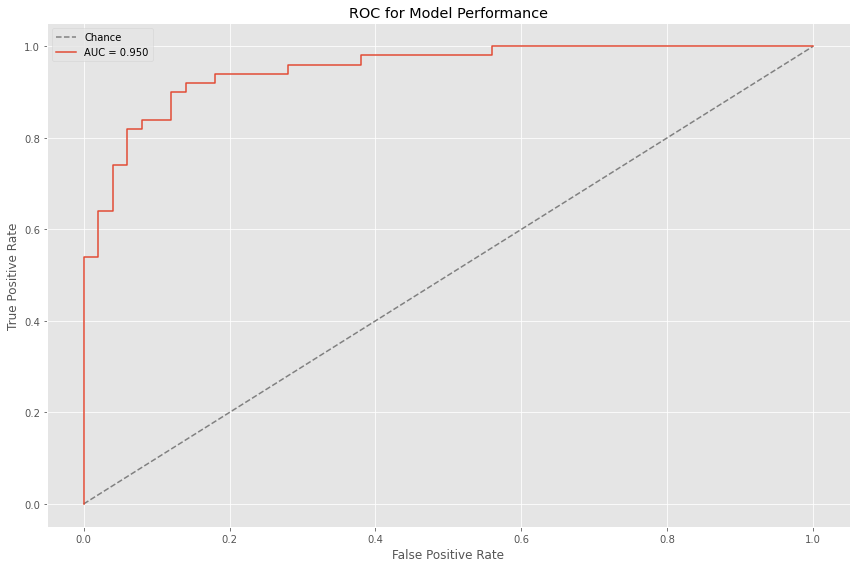

In [54]:
# Plotting the ROC Curve
predictions = model.predict(X_test)

print("\nThe grey line represents a random guess.")
plot_roc(y_test,predictions)